In [1]:
from google.colab import drive 
drive.mount('/content/gdrive') # 將 google drive 掛載在 colob，
# 下載基於 keras 的 yolov3 程式碼
%cd 'gdrive/My Drive'
#!git clone https://github.com/qqwweee/keras-yolo3 # 如果之前已經下載過就可以註解掉
%cd keras-yolo3

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive
/content/gdrive/My Drive/keras-yolo3


In [2]:
!nvidia-smi

Sun Mar  8 08:32:46 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.59       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
!pip install keras==2.2.4

# First Get dataset


In [0]:
rm -r RoadDamageDataset

In [0]:
cp ../Roaddetect/* .

In [9]:
ls

animals_train.txt   __pycache__/           train.py
animals_val.txt     raccoon_dataset/       video/
coco_annotation.py  README.md              voc_annotation.py
convert.py          RoadDamageDataset.tar  yolo3/
darknet53.cfg       roadDemage_test2.txt   yolo.py
font/               roadDemage_test3.txt   yolov3.cfg
kangaroo/           roadDemage_test4.txt   yolov3-tiny.cfg
kmeans.py           roadDemage_test5.txt   yolov3.weights
LICENSE             roadDemage_test.txt    yolo_video.py
logs/               test/
model_data/         train_bottleneck.py


In [11]:
!tar xvf ./RoadDamageDataset.tar

Streaming output truncated to the last 5000 lines.
RoadDamageDataset/Sumida/labels/._Sumida_20170911150154.txt
RoadDamageDataset/Sumida/labels/Sumida_20170911150154.txt
RoadDamageDataset/Sumida/labels/._Sumida_20170911140421.txt
RoadDamageDataset/Sumida/labels/Sumida_20170911140421.txt
RoadDamageDataset/Sumida/labels/._Sumida_20170915152539.txt
RoadDamageDataset/Sumida/labels/Sumida_20170915152539.txt
RoadDamageDataset/Sumida/labels/._Sumida_20170920143031.txt
RoadDamageDataset/Sumida/labels/Sumida_20170920143031.txt
RoadDamageDataset/Sumida/labels/._Sumida_20170921090632.txt
RoadDamageDataset/Sumida/labels/Sumida_20170921090632.txt
RoadDamageDataset/Sumida/labels/._Sumida_20170912154845.txt
RoadDamageDataset/Sumida/labels/Sumida_20170912154845.txt
RoadDamageDataset/Sumida/labels/._Sumida_20170912145948.txt
RoadDamageDataset/Sumida/labels/Sumida_20170912145948.txt
RoadDamageDataset/Sumida/labels/._Sumida_20170913161241.txt
RoadDamageDataset/Sumida/labels/Sumida_20170913161241.txt
RoadD

# The statistical information of the dataset

In [0]:
from xml.etree import ElementTree
from xml.dom import minidom
import collections

import os

import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [0]:
base_path = os.getcwd() + '/RoadDamageDataset/'

damageTypes=["D00", "D01", "D10", "D11", "D20", "D40", "D43", "D44"]

# govs corresponds to municipality name.
govs = ["Adachi", "Chiba", "Ichihara", "Muroran", "Nagakute", "Numazu", "Sumida"]

In [6]:
cls_names = []
total_images = 0
for gov in govs:
    
    file_list = [filename for filename in os.listdir(base_path + gov + '/Annotations/') if not filename.startswith('.')]

    for file in file_list:

        total_images = total_images + 1
        if file =='.DS_Store':
            pass
        else:
            infile_xml = open(base_path + gov + '/Annotations/' +file)
            tree = ElementTree.parse(infile_xml)
            root = tree.getroot()
            for obj in root.iter('object'):
                cls_name = obj.find('name').text
                cls_names.append(cls_name)
print("total")
print("# of images：" + str(total_images))
print("# of labels：" + str(len(cls_names)))

total
# of images：9053
# of labels：15457


D00 : 2768
D01 : 3789
D10 : 742
D11 : 636
D20 : 2541
D40 : 409
D43 : 817
D44 : 3733


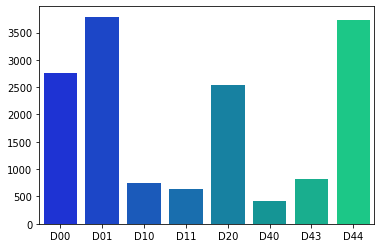

In [7]:
# the number of each class labels.
import collections
count_dict = collections.Counter(cls_names)
cls_count = []
for damageType in damageTypes:
    print(str(damageType) + ' : ' + str(count_dict[damageType]))
    cls_count.append(count_dict[damageType])
    
sns.set_palette("winter", 8)
sns.barplot(damageTypes, cls_count)

In [8]:
# the number of each class labels for each municipality
for gov in govs:
    cls_names = []
    total_images = 0
    file_list = [filename for filename in os.listdir(base_path + gov + '/Annotations/') if not filename.startswith('.')]

    for file in file_list:
        

        total_images = total_images + 1
        if file =='.DS_Store':
            pass
        else:
            infile_xml = open(base_path + gov + '/Annotations/' +file)
            tree = ElementTree.parse(infile_xml)
            root = tree.getroot()
            for obj in root.iter('object'):
                cls_name = obj.find('name').text
                cls_names.append(cls_name)
    print(gov)
    print("# of images：" + str(total_images))
    print("# of labels：" + str(len(cls_names)))
    
    count_dict = collections.Counter(cls_names)
    cls_count = []
    for damageType in damageTypes:
        print(str(damageType) + ' : ' + str(count_dict[damageType]))
        cls_count.append(count_dict[damageType])
        
    print('**************************************************')


Adachi
# of images：1650
# of labels：2924
D00 : 529
D01 : 1013
D10 : 153
D11 : 279
D20 : 172
D40 : 11
D43 : 191
D44 : 567
**************************************************
Chiba
# of images：467
# of labels：797
D00 : 183
D01 : 187
D10 : 13
D11 : 12
D20 : 27
D40 : 3
D43 : 104
D44 : 267
**************************************************
Ichihara
# of images：254
# of labels：482
D00 : 175
D01 : 71
D10 : 18
D11 : 9
D20 : 43
D40 : 8
D43 : 20
D44 : 138
**************************************************
Muroran
# of images：2145
# of labels：3601
D00 : 671
D01 : 574
D10 : 124
D11 : 88
D20 : 1192
D40 : 189
D43 : 50
D44 : 712
**************************************************
Nagakute
# of images：1366
# of labels：2302
D00 : 482
D01 : 477
D10 : 169
D11 : 58
D20 : 351
D40 : 14
D43 : 90
D44 : 659
**************************************************
Numazu
# of images：2032
# of labels：3711
D00 : 560
D01 : 807
D10 : 245
D11 : 129
D20 : 735
D40 : 165
D43 : 161
D44 : 908
************************************

In [9]:
# 安裝相關套件 ，將 training 所需要的套件載入
import os
import subprocess
import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from yolo3.utils import get_random_data
from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from train import get_classes, get_anchors, create_model, create_tiny_model, data_generator, data_generator_wrapper

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import tensorflow as tf



Using TensorFlow backend.


In [0]:
# the number of each class labels for each municipality
base_dir = 'RoadDamageDataset/'

list_file = open(f'RoadDamageDataset_train.txt','w')

classes = ["D00","D01","D10","D11","D20","D40","D43","D44"]

for gov in govs:
    # cls_names = []
    # total_images = 0
    file_list = [filename for filename in os.listdir(base_path + gov + '/Annotations/') if not filename.startswith('.')]

    for file in file_list:
        

        # total_images = total_images + 1
        if file =='.DS_Store':
            pass
        else:
            infile_xml = open(base_path + gov + '/Annotations/' +file)
            tree = ElementTree.parse(infile_xml)
            root = tree.getroot()
            file_name = root.find('filename').text
            list_file.write(str(base_dir)+ str(gov)+ '/JPEGImages/' + str(file_name))
            for obj in root.iter('object'):
                #diff = int(obj.find('difficult').text)
                cls_name = obj.find('name').text
            
                if cls_name not in classes:
                  continue
                
                cls_index = classes.index(cls_name)
                bndbox = obj.find('bndbox')
            
                b = (int(bndbox.find('xmin').text), 
                      int(bndbox.find('ymin').text), 
                      int(bndbox.find('xmax').text), 
                      int(bndbox.find('ymax').text))
            
                list_file.write(" " + ",".join([str(a) for a in b]) + ',' + str(cls_index))
            list_file.write('\n')
            infile_xml.close()
         

In [0]:
# 設定訓練資料來源位置， training data 以及 validation 比例

annotation_path = 'RoadDamageDataset_train.txt'                                  # 轉換好格式的標註檔案
log_dir = 'logs/000/'                                                  # 訓練好的模型儲存的路徑
classes_path = 'model_data/RoadDamageDataset_classes.txt'
anchors_path = 'model_data/yolo_anchors.txt'

class_names = get_classes(classes_path)
num_classes = len(class_names)
anchors = get_anchors(anchors_path)


# 分為 training 以及 validation
val_split = 0.25
with open(annotation_path) as f:
    train_lines = f.readlines()

with open('animals_val.txt') as f:
    val_lines = f.readlines()

np.random.seed(10101)
np.random.shuffle(train_lines)
np.random.seed(None)
num_val = len(val_lines)
num_train = len(train_lines)

# yolo3 模型設定與訓練

In [11]:
#  載入 yolov3 Keras模型與權重

if not os.path.exists("model_data/yolo.h5"):                    # 載入 yolov3 Keras模型 (hdf5存储格式)
    print("Model doesn't exist, downloading...")
    os.system("wget https://pjreddie.com/media/files/yolov3.weights")
    print("Converting yolov3.weights to yolo.h5...")
    os.system("python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5")
else:
    print("Model exist")

if not os.path.exists("model_data/yolo_weights.h5"):             # 載入 yolov3 的網路權重
    print("Converting pretrained YOLOv3 weights for training")
    os.system("python convert.py -w yolov3.cfg yolov3.weights model_data/yolo_weights.h5") 
else:
    print("Pretrained weights exists")

Model exist
Pretrained weights exists


In [12]:
# 模型參數設定 ，設定logging, checkpoint, reduce_lr, early_stopping

input_shape = (416,416)                                                 # multiple of 32, hw

is_tiny_version = len(anchors)==6                                       # default setting
if is_tiny_version:
    model = create_tiny_model(input_shape, anchors, num_classes, freeze_body=2, weights_path='model_data/tiny_yolo.h5')
else:
    model = create_model(input_shape, anchors, num_classes, freeze_body=2, weights_path='model_data/yolo_weights.h5')   # make sure you know what you freeze
    # model = create_model(input_shape, anchors, num_classes, freeze_body=2, weights_path='logs/000/trained_weights_final.h5')
                        
logging = TensorBoard(log_dir=log_dir)

checkpoint = ModelCheckpoint(log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
                             monitor='val_loss', 
                             save_weights_only=True, 
                             save_best_only=True, 
                             period=3)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.1, 
                              patience=10, 
                              verbose=1)

early_stopping = EarlyStopping(monitor='val_loss', 
                               min_delta=0.001, 
                               patience=20, 
                               verbose=1)














Create YOLOv3 model with 9 anchors and 8 classes.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_59 due to mismatch in shape ((1, 1, 1024, 39) vs (255, 1024, 1, 1)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_59 due to mismatch in shape ((39,) vs (255,)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_67 due to mismatch in shape ((1, 1, 512, 39) vs (255, 512, 1, 1)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_67 due to mismatch in shape ((39,) vs (255,)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_75 due to mismatch in shape ((1,

Load weights model_data/yolo_weights.h5.
Freeze the first 249 layers of total 252 layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
# yoloV3模型訓練

%tensorflow_version 1.x           # 確保 colob 中使用的 tensorflow 是 1.x 版本而不是 tensorflow 2
print(tf.__version__)

# 自定義圖像擴增 data_generator
def data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes, is_train=True):
    '''data generator for fit_generator'''
    n = len(annotation_lines)
    i = 0
    while True:
        image_data = []
        box_data = []
        for b in range(batch_size):
            if i==0 and is_train:
                np.random.shuffle(annotation_lines)
            image, box = get_random_data(annotation_lines[i], input_shape, random=is_train)
            image_data.append(image)
            box_data.append(box)
            i = (i+1) % n
        image_data = np.array(image_data)
        box_data = np.array(box_data)
        y_true = preprocess_true_boxes(box_data, input_shape, anchors, num_classes)
        yield [image_data, *y_true], np.zeros(batch_size)




# 第一階段訓練: 先 freeze YOLO (除了 output layer) 以 backbone Model (yolo.h5) 及預設的權重 來 train 模型

if True:
    batch_size=5
    model.compile(optimizer=Adam(lr=1e-3), loss={'yolo_loss': lambda y_true, y_pred: y_pred})           # use custom yolo_loss Lambda layer.
    print(f'第一階段訓練 : Train on {num_train} samples, val on {num_val} samples, with batch size {batch_size}.')

    history1 = model.fit_generator(data_generator(train_lines, batch_size, input_shape, anchors, num_classes, False),   # 使用原本的資料集訓練
            steps_per_epoch=max(1, num_train//batch_size),
            epochs=15,
            validation_data=data_generator(val_lines, batch_size, input_shape, anchors, num_classes, False),
            validation_steps=max(1, num_val//batch_size),
            initial_epoch=0,
            callbacks=[logging, checkpoint, reduce_lr, early_stopping])
    model.save_weights(log_dir + 'trained_weights_stage_1.h5')





# 第二階段訓練: 把所有 layer 都改為 trainable ，做 fine-tune

if True:
    print('\n 第二階段訓練 : Unfreeze all of the layers.')
    for i in range(len(model.layers)):                            # 把所有 layer 都改為 trainable
        model.layers[i].trainable = True

    batch_size=3                                                  # note that more GPU memory is required after unfreezing the body       
    model.compile(optimizer=Adam(lr=1e-4), loss={'yolo_loss': lambda y_true, y_pred: y_pred})      # recompile to apply the change
    print(f'Train on {num_train} samples, val on {num_val} samples, with batch size {batch_size}.')

    history2 = model.fit_generator(data_generator(train_lines, batch_size, input_shape, anchors, num_classes, True),    # 將原本的資料集調變後訓練
        steps_per_epoch=max(1, num_train//batch_size),
        epochs=15,
        validation_data=data_generator(val_lines, batch_size, input_shape, anchors, num_classes, False),
        validation_steps=max(1, num_val//batch_size),
        initial_epoch=0,
        callbacks=[logging, checkpoint, reduce_lr, early_stopping])
 
    model.save_weights(log_dir + 'trained_weights_final.h5')

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x           # 確保 colob 中使用的 tensorflow 是 1.x 版本而不是 tensorflow 2`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
1.15.0

第一階段訓練 : Train on 9053 samples, val on 73 samples, with batch size 5.




Epoch 1/15
1810/1810 [==============================] - 258s 142ms/step - loss: 95.1803 - val_loss: 33.2665

Epoch 2/15
1810/1810 [==============================] - 234s 129ms/step - loss: 29.2979 - val_loss: 33.5421
Epoch 3/15
1810/1810 [==============================] - 233s 129ms/step - loss: 27.9366 - val_loss: 33.8777
Epoch 4/15
1810/1810 [==============================] - 233s 128ms/step - loss: 27.2537 - val_loss: 32.8385
Epoch 5/15
1810/1810 [==============================] - 233s 129ms/step - loss: 26.7801 - val_loss: 34.0048
Epoch 6/15
1810/1810 [==============================] - 232s 128ms/step - loss: 26.5172 - val_loss: 34.5062
Epoch 7/1

Text(0.5, 0, 'epochs')

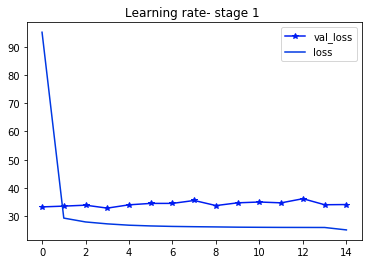

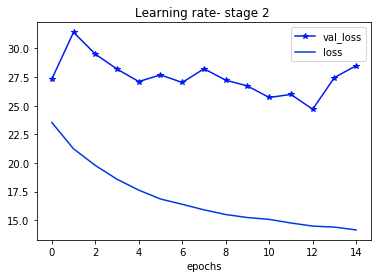

In [16]:
import matplotlib.pyplot as plt

plt.figure()
plt.title('Learning rate- stage 1 ')  
plt.plot(history1.history["val_loss"], "-*" ,  label="val_loss")
plt.plot(history1.history["loss"], label="loss")
plt.legend(loc='upper right')

plt.figure()
plt.title('Learning rate- stage 2 ')  
plt.plot(history2.history["val_loss"], "-*" ,  label="val_loss")
plt.plot(history2.history["loss"], label="loss")
plt.legend(loc='upper right')
plt.xlabel("epochs")

In [24]:
import os, random
print(random.choice(os.listdir("RoadDamageDataset/Numazu/JPEGImages/")))
#cp RoadDamageDataset/Numazu/JPEGImages/Numazu_20170905143903.jpg ./test/

Numazu_20170906142902.jpg


In [0]:

 RoadDamageDataset/Nagakute/JPEGImages/Nagakute_20170907131823.jpg ./test/

logs/000/trained_weights_final.h5 model, anchors, and classes loaded.
(416, 416, 3)
Found 2 boxes for img
D44 0.37 (361, 382) (490, 520)
D01 0.34 (172, 307) (309, 598)
5.001682107998931


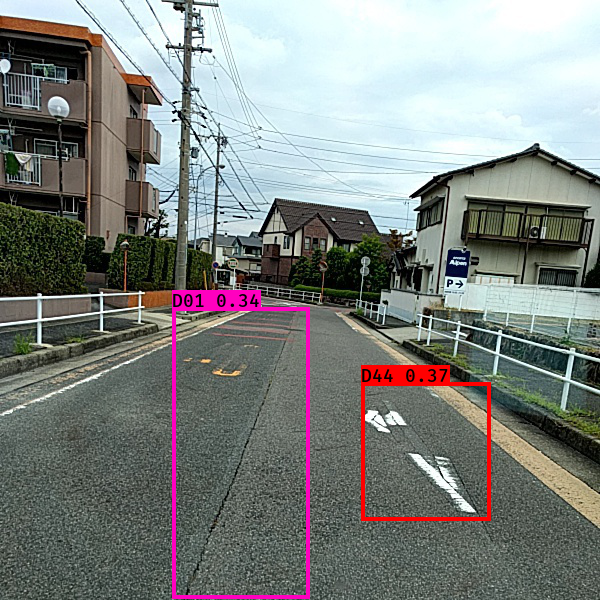

In [33]:
# 載入yolo模型 與 訓練後的權重

from yolo import YOLO
yolo_model = YOLO(model_path=log_dir + 'trained_weights_final.h5', classes_path=classes_path)

from PIL import Image
from IPython import display

image = Image.open(os.path.join('RoadDamageDataset/Nagakute/JPEGImages/', \
                                random.choice(os.listdir("RoadDamageDataset/Nagakute/JPEGImages/"))))      # 讀取範例圖片
r_img = yolo_model.detect_image(image)               # 執行 yolo 檢測，將回傳的圖片儲存在 r_image 中
display.display(r_img)

logs/000/trained_weights_final.h5 model, anchors, and classes loaded.
(416, 416, 3)
Found 1 boxes for img
D20 0.32 (5, 265) (221, 502)
4.559566051000729


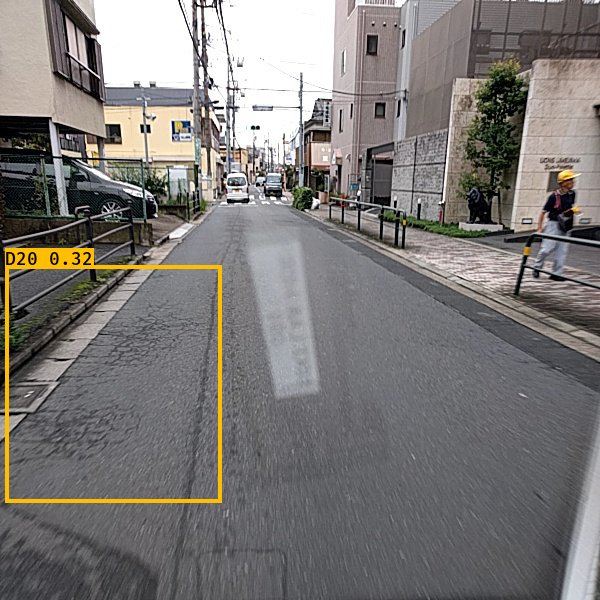

In [32]:
# 載入yolo模型 與 訓練後的權重

from yolo import YOLO
yolo_model = YOLO(model_path=log_dir + 'trained_weights_final.h5', classes_path=classes_path)

from PIL import Image
from IPython import display

for file in os.listdir('test'):
    image = Image.open(os.path.join('test/', file))      # 讀取範例圖片
    r_img = yolo_model.detect_image(image)               # 執行 yolo 檢測，將回傳的圖片儲存在 r_image 中
    display.display(r_img)

logs/000/trained_weights_final.h5 model, anchors, and classes loaded.
(416, 416, 3)
Found 2 boxes for img
D44 0.72 (402, 431) (567, 569)
D44 0.78 (269, 408) (347, 537)
6.071212308997929


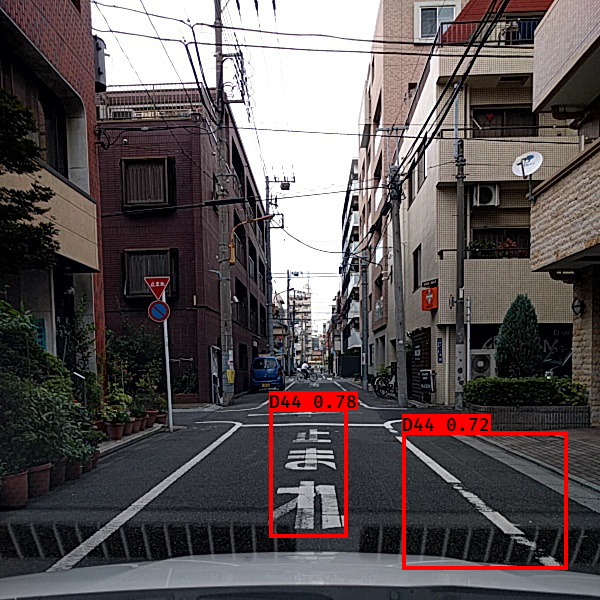

In [35]:
# 載入yolo模型 與 訓練後的權重

from yolo import YOLO
yolo_model = YOLO(model_path=log_dir + 'trained_weights_final.h5', classes_path=classes_path)

from PIL import Image
from IPython import display

image = Image.open(os.path.join('RoadDamageDataset/Sumida/JPEGImages/', \
                                random.choice(os.listdir("RoadDamageDataset/Sumida/JPEGImages/"))))      # 讀取範例圖片
r_img = yolo_model.detect_image(image)               # 執行 yolo 檢測，將回傳的圖片儲存在 r_image 中
display.display(r_img)